---
<br/><br/>
<br/><br/>
<br/><br/>
## Session 8 - Intro ML 2

_Julian Besems_
<br/><br/>
<br/><br/>
<br/><br/>

---
<br/><br/>
<br/><br/>
<br/><br/>
### Regression, Clustering, SOM

<br/><br/>
<br/><br/>
<br/><br/>

---
# Supervised learning

__Mapping input to a desired output__

We have a desired target function ```f``` 

The learning task is to optimise ```f``` so that given an input ```X``` it produces an output variable ```Y```:

```Y = f(X)```

---
# Parametric learning algorithms

__Make an assumption about the ```f```__

We assume that the solution function has a certain form, and use learning to optimise the coefficients in that function. 

Simplifies the learning process, but can be limiting compared to nonparametric algorithms. 

__Parametric example:__ Linear regression

__Nonprametric example:__ Neural Networks

---
# Linear regression

A method derived from statistics

A set of data points, and the desired function is of the form $Y = A + BX$ where $A, B$ are the coefficients that have to be learned, so that the line is the best fit to the data. 

$X$ is the independent variable, and $Y$ the dependent variable.

Higher dimensions than 2d data will add more input variables and coefficients. 

---
# Gradient Descent

<img src="https://miro.medium.com/max/1400/1*CjTBNFUEI_IokEOXJ00zKw.gif" alt="drawing" width="600"/>

This method relies on that the solution converges. So on either side of the parameter values, they point to the same solution. Continuously adapting the parameters until the optimal values are found. Hence gradient descent:

<img src="https://miro.medium.com/max/1400/1*N5WjbzwsCFse-KPjBWZZ6g.jpeg" alt="drawing" width="600"/><br/><br/>

_source: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931_

In our example of linear regression, these values are $A,B$ to get the best prediction of $Y$ given $X$

### Loss Function

We need the error of the current solution, to make changes to improve the solution. This is done through the __Loss function__. 
We will use Mean Squared Error:

- Difference between $y$ and predicted $\bar{y}$ $(\bar{y} = Bx + A)$ : $y - \bar{y}$
- Square the difference so it is a positive value: $(y - \bar{y})^2$
- Mean of all squares for all values in $X$: $E = \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2$
- $E = \frac{1}{n}\sum_{i=1}^{n} (y_i - (Bx_i + A))^2$

### The algorithm

Choose starting values for $A,B$. Lets start with $A = 0, B = 0$

$L$ is the learning rate, which determines how much $B$ changes per step. The smaller $L$ is the more accurate the outcome but the slower the training process. 

We have to get the partial derivative in respect to $A$ and $B$. Given here as:

$D_A = \frac{-2}{n} \sum_{i=1}^{n}(y_i - \bar{y}_i)$

$D_B = \frac{-2}{n} \sum_{i=1}^{n}x_i(y_i - \bar{y}_i)$

---
Now with that, the values of A and B are updated as follows:

$A = A - L * D_A$

$B = B - L * D_B$

(This will essentially make the value follow along the gradient, hence named gradient descent)

This is repeated until the loss function is as small as possible, the closer to 0 the better the fit. 

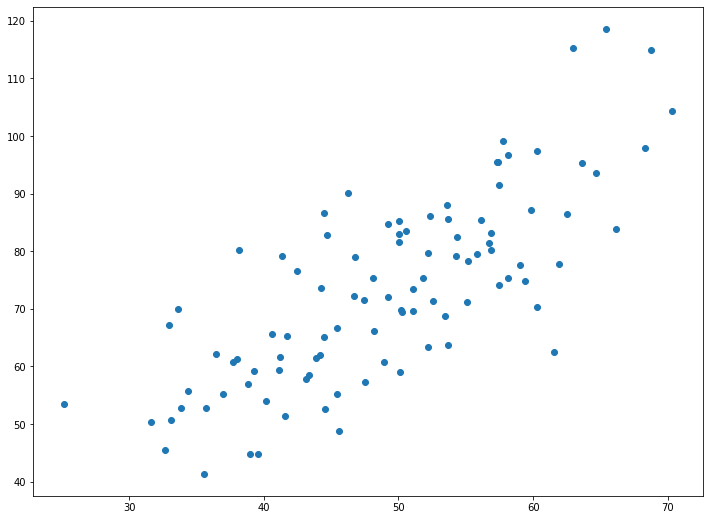

In [1]:

# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [2]:
# Building the model
A = 0
B = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = B*X + A  # The current predicted value of Y
    D_B = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt B
    D_A = (-2/n) * sum(Y - Y_pred)  # Derivative wrt A
    B = B - L * D_B  # Update B
    A = A - L * D_A  # Update A
print (A, B)

0.10148121494753734 1.4796491688889395


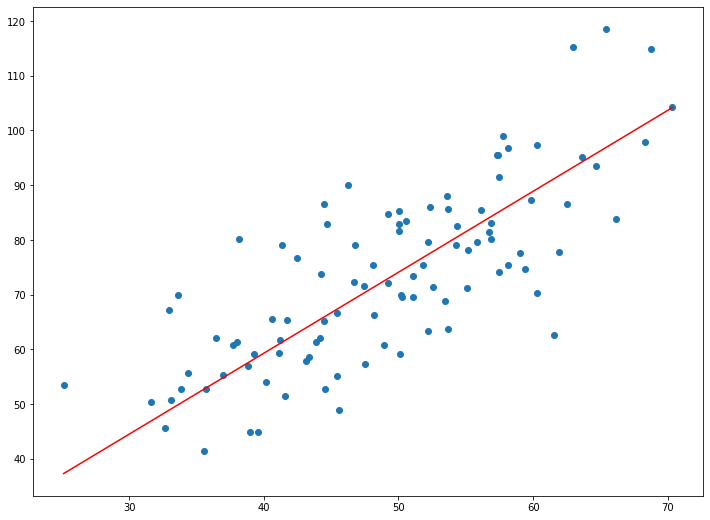

In [3]:
# Making predictions
Y_pred = B*X + A

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

---
# Least Squares

Another method is through least squares (Better for this particular instance, but more specific solution to this problem)

Optimise the line, so that the total distance from the points to the line is minimised. 

Simple least squares is calculated through one function:

Where

$B = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $

$A = \bar{y} - B\bar{x}$

here $\bar{y}, \bar{x}$ are the mean value of all $y \in Y$ and $x \in X$

_source: https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570_

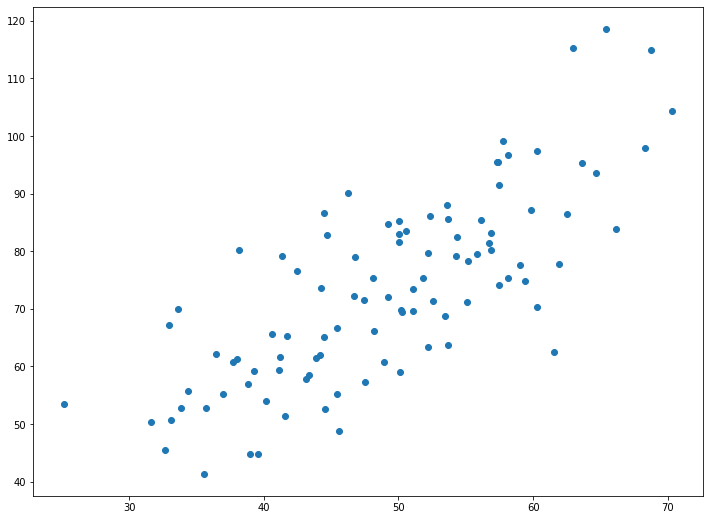

In [4]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [5]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
B = num / den
A = Y_mean - B*X_mean

print (A, B)

9.90860619032653 1.2873573700109315


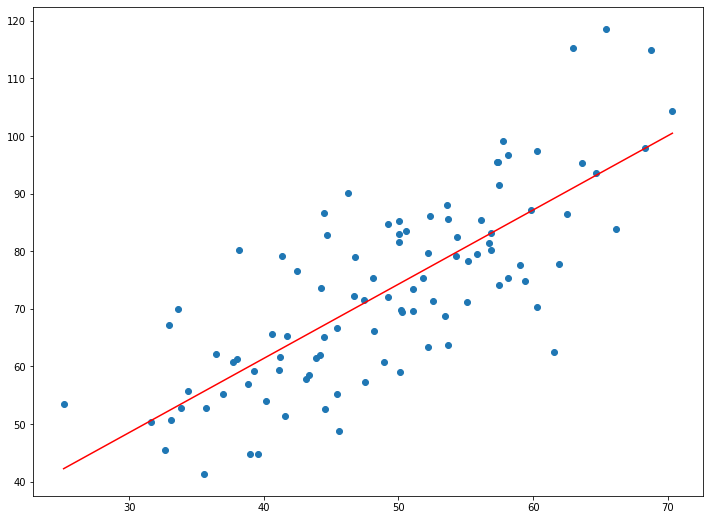

In [6]:
# Making predictions
Y_pred = B*X + A

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

---
The result is a line that has least squares to the datapoints. 

The quality of the fit is given by the error function:

$E(x) = \sum_{i=1}^{n} (y_i - p_i)^2$

<img src="https://miro.medium.com/max/700/0*OVG0UBquPwSiwiUi" alt="drawing" width="600"/><br/><br/>

---
# Polynomial regression with least squares


_source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491_

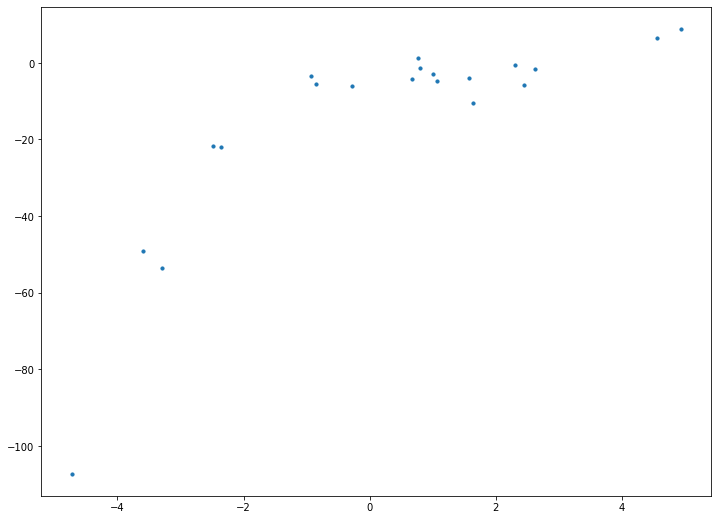

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Applying linear regression to this like in the previous cas will give:

15.908242501429998
0.6386750054827146


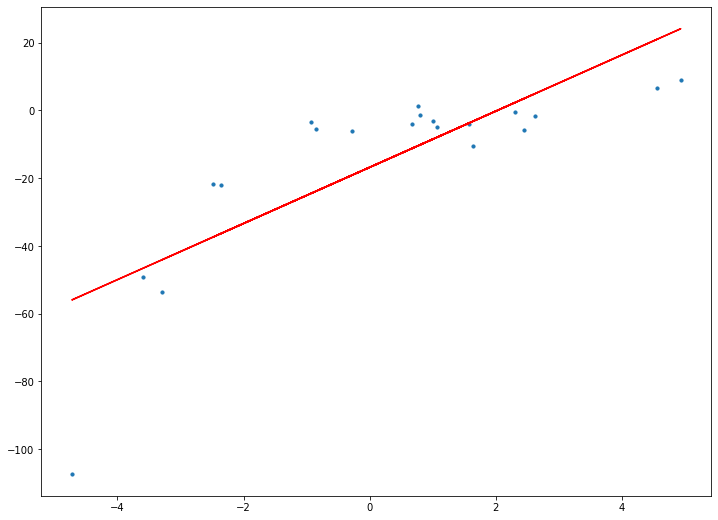

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# transforming the data to include another axis
x1 = x[:, np.newaxis]
y1 = y[:, np.newaxis]

model = LinearRegression()
model.fit(x1, y1)
y_pred = model.predict(x1)

rmse = np.sqrt(mean_squared_error(y1,y_pred))
r2 = r2_score(y1,y_pred)
print(rmse)
print(r2)

plt.scatter(x1, y1, s=10)
plt.plot(x1, y_pred, color='r')
plt.show()

Not great, so we have _under fitting_, meaning that the model is too simplified for the goal we want to achieve

So we need a higher order equation. Instead of:

$Y = A + BX$

$Y = A + BX + CX^2$

10.120437473614711
0.8537647164420812


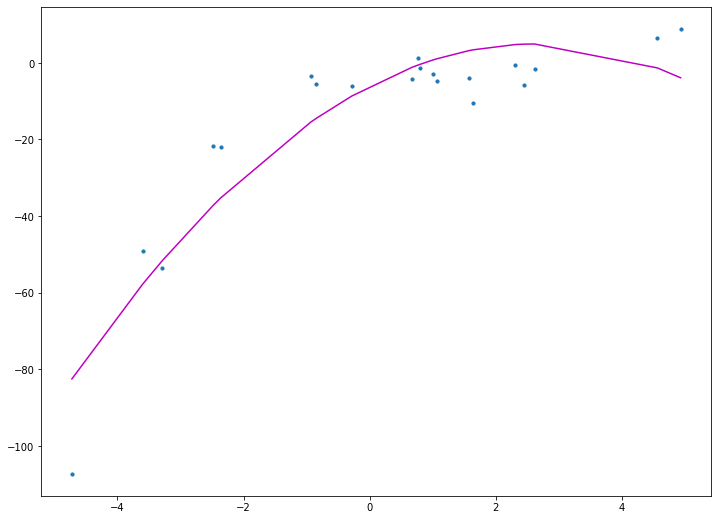

In [11]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x2 = x[:, np.newaxis]
y2 = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2) # A fit of polynomial degree 2
x_poly = polynomial_features.fit_transform(x2)

model = LinearRegression()
model.fit(x_poly, y2)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y2,y_poly_pred))
r2 = r2_score(y2,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y_poly_pred), key=sort_axis)
x2, y_poly_pred = zip(*sorted_zip)
plt.plot(x2, y_poly_pred, color='m')
plt.show()


Much better, but Could still be improved

3.449895507408725
0.9830071790386679


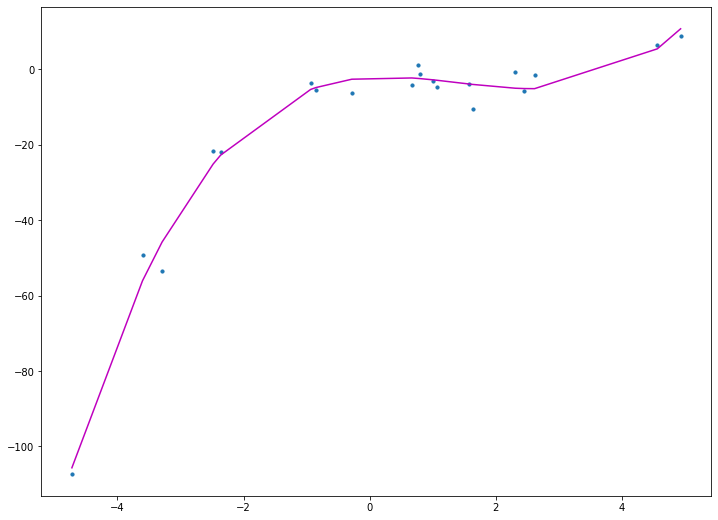

In [15]:
# transforming the data to include another axis
x3 = x[:, np.newaxis]
y3 = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3) # A fit of polynomial degree 3
x_poly = polynomial_features.fit_transform(x3)

model = LinearRegression()
model.fit(x_poly, y3)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y3,y_poly_pred))
r2 = r2_score(y3,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x3, y3, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x3,y_poly_pred), key=sort_axis)
x3, y_poly_pred = zip(*sorted_zip)
plt.plot(x3, y_poly_pred, color='m')
plt.show()



<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

---
# Clustering

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" alt="drawing" width="1200"/><br/><br/>

https://scikit-learn.org/stable/modules/clustering.html#clustering

https://machinelearningmastery.com/clustering-algorithms-with-python/

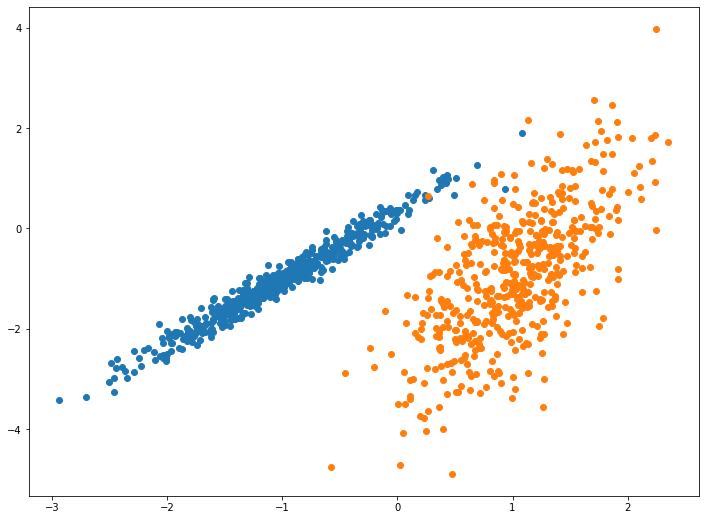

In [16]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

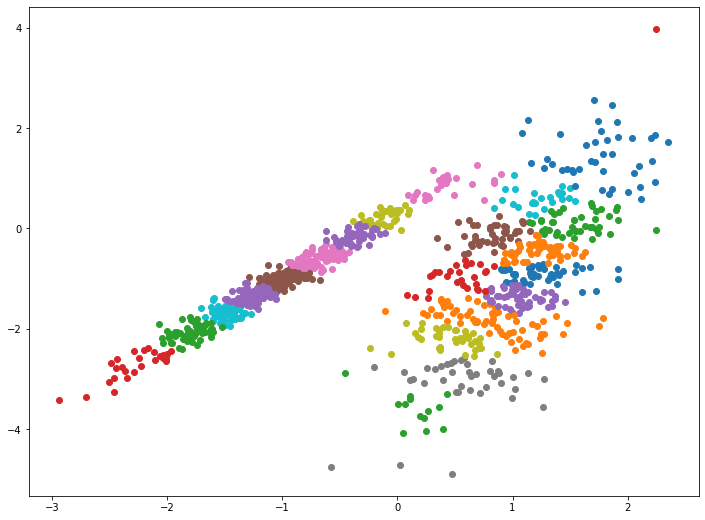

In [18]:
# affinity propagation clustering
from numpy import unique
from sklearn.cluster import AffinityPropagation

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AffinityPropagation(damping=0.9)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

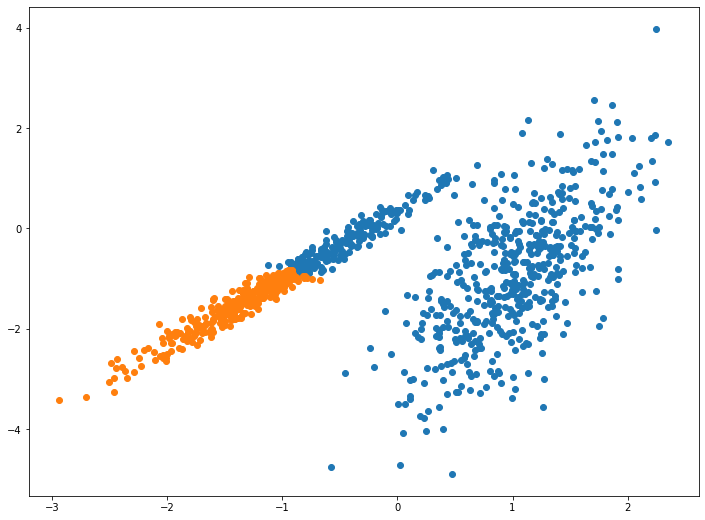

In [19]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters

clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

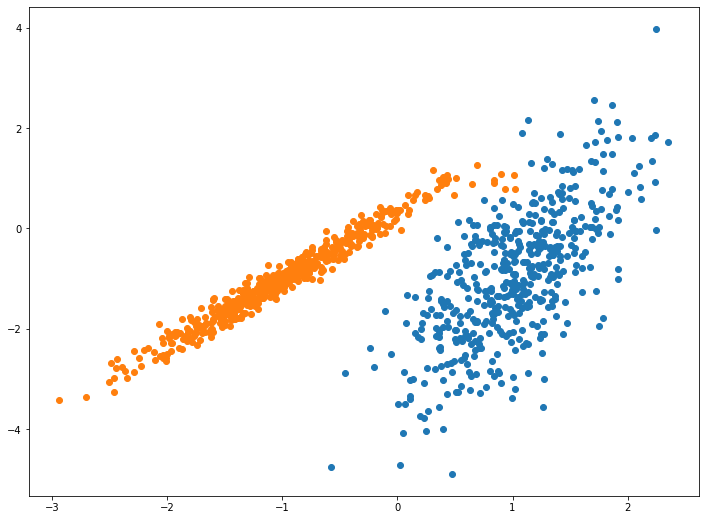

In [20]:
# birch clustering
from sklearn.cluster import Birch
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = Birch(threshold=0.01, n_clusters=2)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

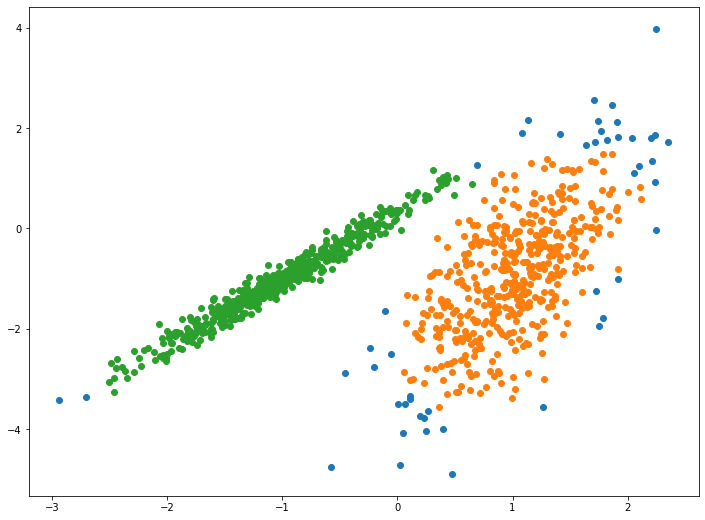

In [21]:
# dbscan clustering
from sklearn.cluster import DBSCAN

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

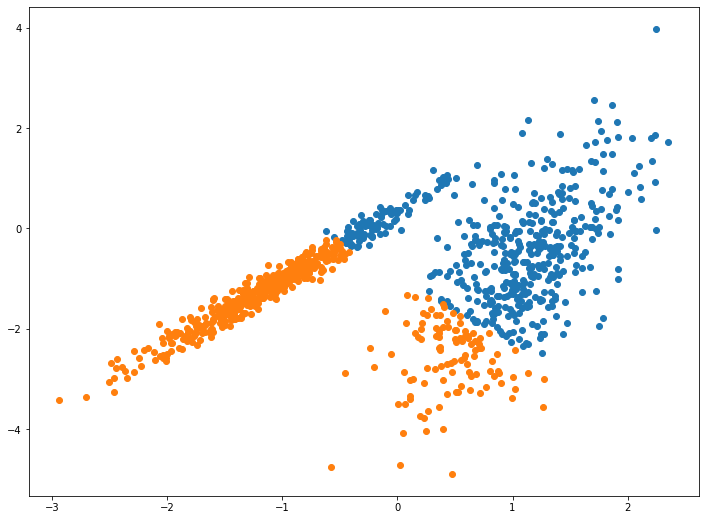

In [24]:
# k-means clustering
from sklearn.cluster import KMeans
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

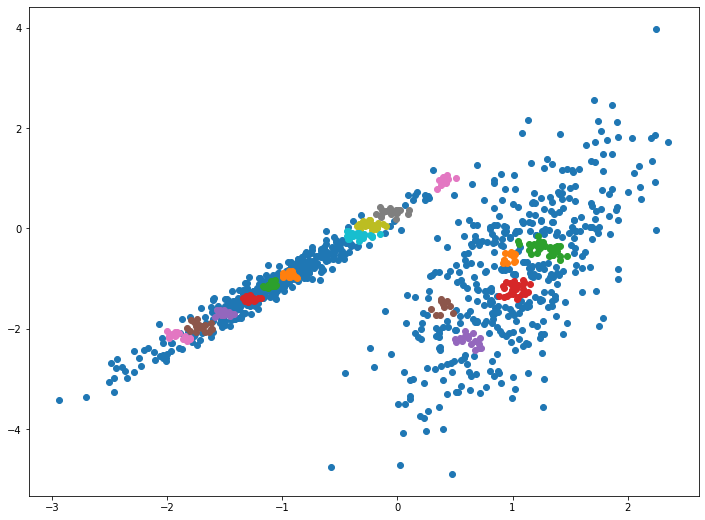

In [25]:
# optics clustering
from sklearn.cluster import OPTICS
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

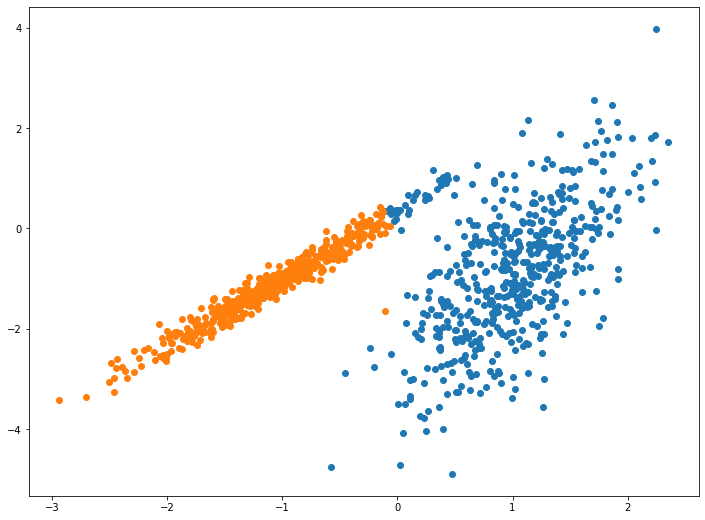

In [26]:
# spectral clustering
from sklearn.cluster import SpectralClustering
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

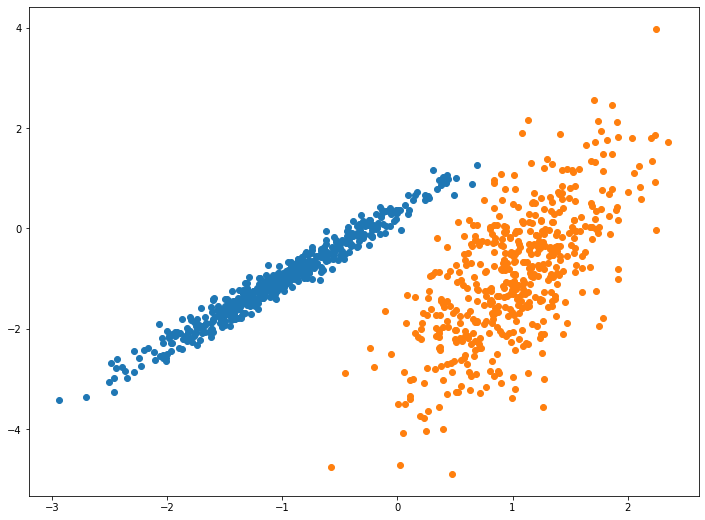

In [27]:
# gaussian mixture clustering
from sklearn.mixture import GaussianMixture
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

---
# Self Organising Maps

Example: https://miro.romanvlahovic.com/2019/10/14/voids-brands-characters-and-how-to-deal-with-lots/

Introduced by __Teuvo Kohonen__ in 1982

Unsupervised learning method, specifically Competitive Learning. 

A training set X. And a map SOM. The SOM consists of a grid with weights. 

Algorithm:
- Initialise SOM with random grid weights
- Repeat following until convergance or maximum epochs
    - Shuffle training examples
    - For each training instance x
        - Find BMU in SOM
        - Update neighbourhood of BMU to draw closer to weights of x. 


_source: https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/_

In [28]:
import numpy as np
import matplotlib.pyplot as plt

Learning rate is influenced by a decay

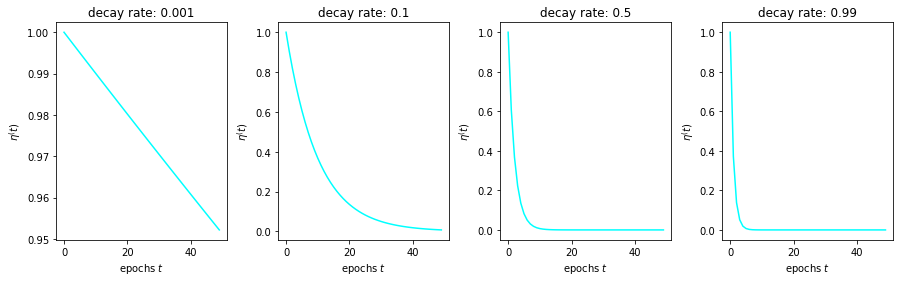

In [29]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Radius which determines the influence of the training example. Start with large radius, and let it become smaller during the training example so that the neighbourhood is taken into account more. 

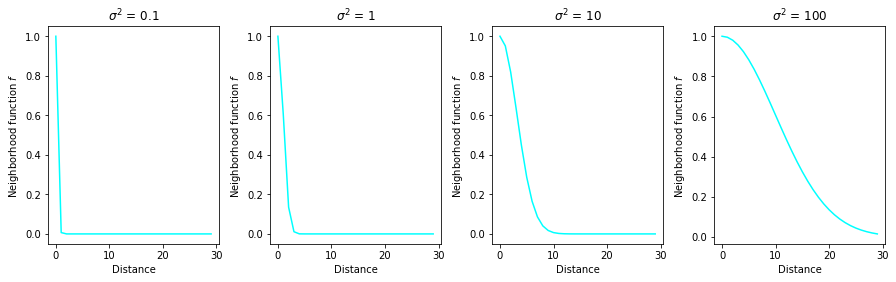

In [30]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [31]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

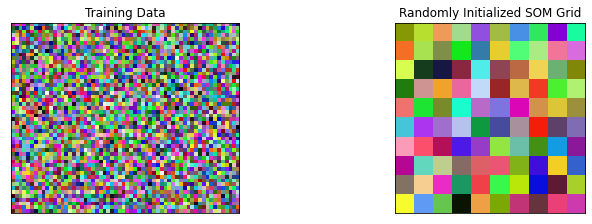

In [32]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

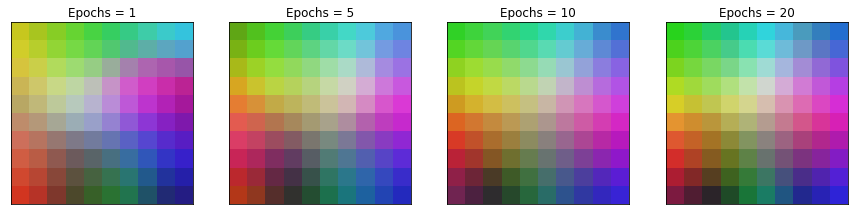

In [33]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

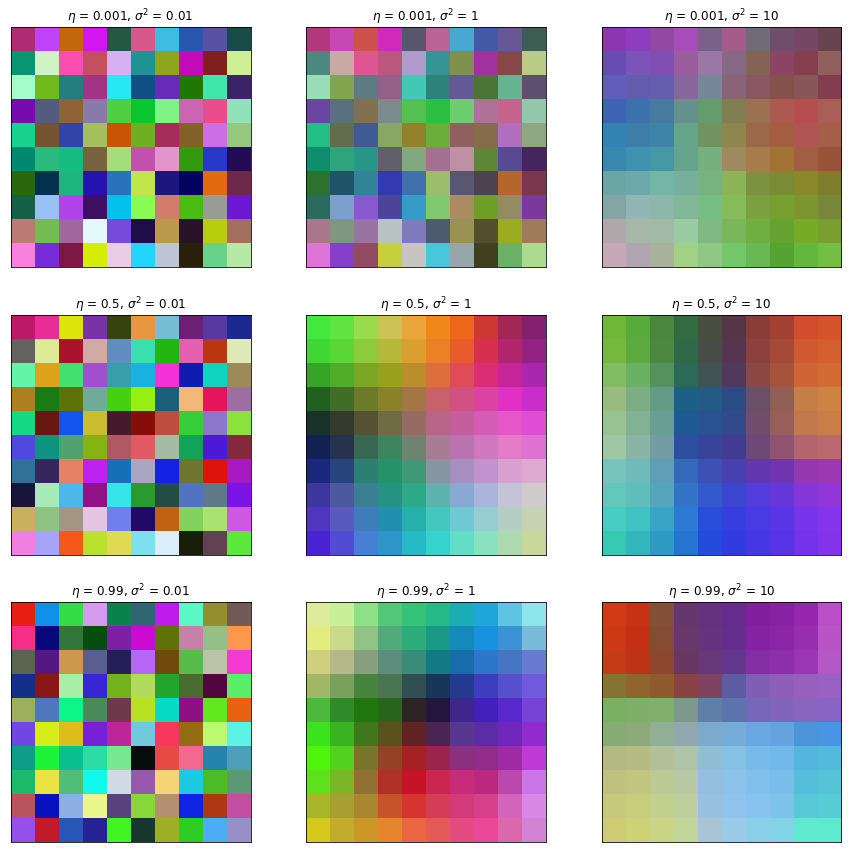

In [34]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

# Resources

Regression

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

Clustering 
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
https://machinelearningmastery.com/clustering-algorithms-with-python/